In [10]:
from keras.models import load_model
from random import randint
import  numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import  confusion_matrix,ConfusionMatrixDisplay
%matplotlib inline
import itertools
import matplotlib.pyplot as plt



In [11]:
new=load_model('models/medcial_trial_model.h5')

test


In [9]:
test_lables=[]
test_sample=[]

for i in range(50):
    youn_rand = randint(13,65)
    test_sample.append(youn_rand)
    test_lables.append(1)
    
    old_rand = randint(65,100)
    test_sample.append(old_rand)
    test_lables.append(0)

for i in range(250):
    youn_rand = randint(13,65)
    test_sample.append(youn_rand)
    test_lables.append(0)
    
    old_rand = randint(65,100)
    test_sample.append(old_rand)
    test_lables.append(1)
test_sample=np.array(test_sample)
test_lables=np.array(test_lables)
test_lables,test_sample = shuffle(test_lables,test_sample)
sclar = MinMaxScaler(feature_range=(0,1))
scaled_test_sample = sclar.fit_transform(test_sample.reshape(-1,1))

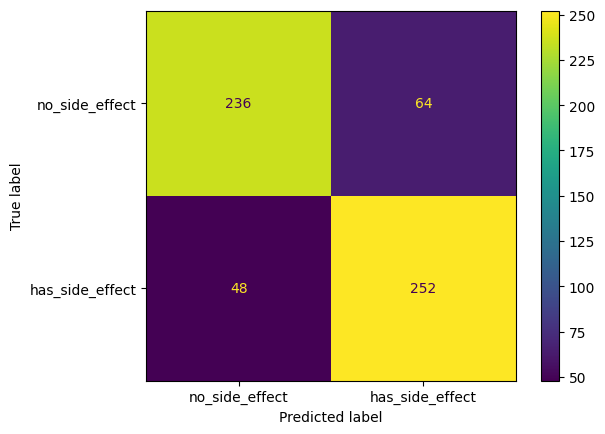

In [12]:
pre=new.predict(x=scaled_test_sample,batch_size=10,verbose=0)
round_pre=np.argmax(pre,axis=-1)
cm = confusion_matrix(y_true=test_lables,y_pred=round_pre)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no_side_effect', 'has_side_effect'])
cm_display.plot()
plt.show()